# Introduction

It is almost impossible that you are in data science and haven’t used Iris data as your first data set for data exploration and visualization. And quite rightly so, it is a great dataset to apply the nascent knowledge. There is an interesting alternative to Iris data, which is almost similar to it. It is a dataset comprising various measurements of three different penguin species, namely Adelie, Gentoo, and Chinstrap. Same as Iris data which had measurements of three different species of the Iris flower. Anyway, both are great for what they are made of.

The rigorous study was conducted in the islands of the Palmer Archipelago, Antarctica. These data were collected from 2007 to 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network.

# Import libraries for this projects 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Import  Data set 

In [4]:
df = pd.read_csv('D:\\Google Data Analytics Certifcate Program\\Ekkeda Data Science  recording  2022\\Mini projects\\Exploratory Data Analysis\\archive\\penguins_lter.csv')
dfc = df.copy() #we keep a copy in case we need the original data set

In [7]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11-11-2007,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11-11-2007,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [8]:
# Dataset Statistics
df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [11]:
df.shape

(344, 17)

In [12]:
df['Sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [13]:
df['Island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [14]:
df['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

In [15]:
droppers = ['studyName', 'Sample Number', 'Region', 'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments']
df.drop(droppers, axis = 1, inplace=True, errors = 'Ignore')
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [16]:
df['Species'].value_counts(dropna=False)

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

In [17]:
df['Island'].value_counts(dropna=False)

Biscoe       168
Dream        124
Torgersen     52
Name: Island, dtype: int64

In [18]:
df['Culmen Length (mm)'].value_counts(dropna=False)

41.1    7
45.2    6
45.5    5
37.8    5
50.0    5
       ..
34.0    1
36.3    1
35.2    1
52.7    1
47.7    1
Name: Culmen Length (mm), Length: 165, dtype: int64

In [19]:
df['Culmen Depth (mm)'].value_counts(dropna=False)

17.0    12
15.0    10
18.6    10
18.5    10
17.9    10
        ..
13.2     1
13.6     1
13.3     1
13.4     1
21.5     1
Name: Culmen Depth (mm), Length: 81, dtype: int64

In [20]:
df['Flipper Length (mm)'].value_counts(dropna=False)

190.0    22
195.0    17
187.0    16
193.0    15
210.0    14
191.0    13
215.0    12
196.0    10
197.0    10
185.0     9
216.0     8
208.0     8
198.0     8
220.0     8
230.0     7
192.0     7
212.0     7
184.0     7
181.0     7
189.0     7
186.0     7
217.0     6
188.0     6
214.0     6
222.0     6
213.0     6
199.0     6
201.0     6
194.0     5
203.0     5
180.0     5
218.0     5
219.0     5
221.0     5
209.0     5
178.0     4
202.0     4
200.0     4
225.0     4
228.0     4
224.0     3
182.0     3
205.0     3
211.0     2
183.0     2
229.0     2
223.0     2
207.0     2
NaN       2
172.0     1
206.0     1
179.0     1
174.0     1
231.0     1
226.0     1
176.0     1
Name: Flipper Length (mm), dtype: int64

In [21]:
df['Body Mass (g)'].value_counts(dropna=False)

3800.0    12
3700.0    11
3950.0    10
3900.0    10
3550.0     9
          ..
4475.0     1
6300.0     1
4675.0     1
3100.0     1
3850.0     1
Name: Body Mass (g), Length: 95, dtype: int64

In [22]:
df['Sex'].value_counts(dropna=False)

MALE      168
FEMALE    165
NaN        10
.           1
Name: Sex, dtype: int64

In [23]:
for i in df.columns:
    if(df[i].isnull()).any()==True:
        if(df[i].dtype)=='float64':
            df[i]=df[i].replace(np.nan,df[i].mean())
        if(df[i].dtype)=='object':
            df[i]=df[i].replace(np.nan,df[i].mode()[0])

In [24]:
df['Sex']=df['Sex'].replace('0', 'NaN')

In [25]:
df['Sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

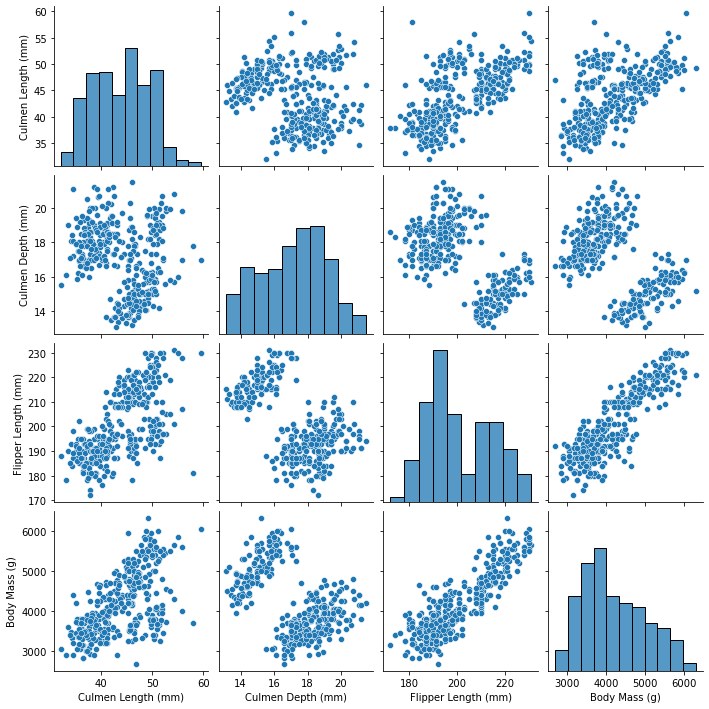

In [26]:
sns.pairplot(data=df, vars=['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'])

In [27]:
df_un = df['Sex'].unique(), df['Island'].unique(), df['Species'].unique()
df_un

(array(['MALE', 'FEMALE', '.'], dtype=object),
 array(['Torgersen', 'Biscoe', 'Dream'], dtype=object),
 array(['Adelie Penguin (Pygoscelis adeliae)',
        'Chinstrap penguin (Pygoscelis antarctica)',
        'Gentoo penguin (Pygoscelis papua)'], dtype=object))

In [28]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [29]:
df.isnull().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [30]:
df['Culmen Length (mm)'] = pd.to_numeric(df['Culmen Length (mm)'])
df['Culmen Depth (mm)'] = pd.to_numeric(df['Culmen Depth (mm)'])
df['Flipper Length (mm)'] = pd.to_numeric(df['Flipper Length (mm)'])
df['Body Mass (g)'] = pd.to_numeric(df['Body Mass (g)'])

In [31]:
df.dtypes

Species                 object
Island                  object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
dtype: object

<AxesSubplot:>

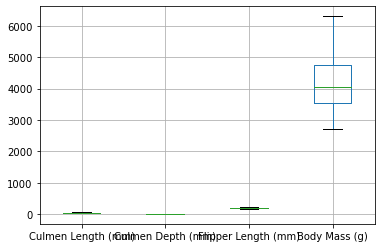

In [32]:
df.boxplot()

<AxesSubplot:>

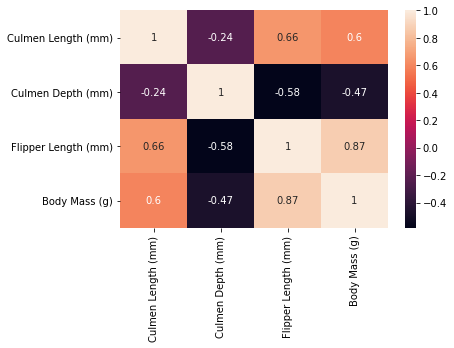

In [33]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

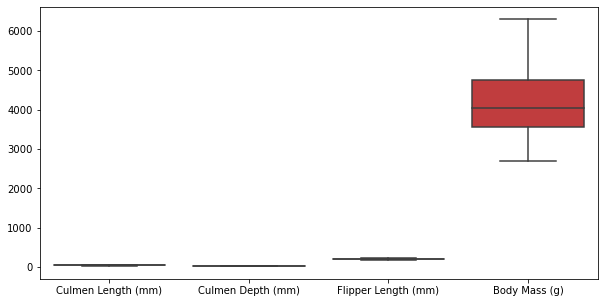

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
Sc=StandardScaler()

In [ ]:
 for i in df.columns:
    if(df[i].dtype=='float64'):
        a=np.asarray(df[i])
        a=a.reshape(-1,1)
        df[i]=Sc.fit_transform(a)

<AxesSubplot:>

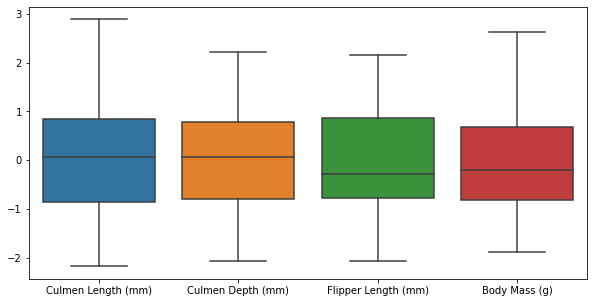

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)

# Conclusion

So, this was all about data exploration and visualisation of Palmer Penguins’ data. Below are some key takeaways from the above article:

We applied data exploration methods to understand the dataset better, and used the different data manupulation  techniques
in python different libraries to take care of missing data.

 Used Seaborn  and Graph object to plot different interactive plots describing relationships among variables.